In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('googleplay.csv')
df1 = pd.read_csv('testdata.csv')

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


# download pretrained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
glove_dir = './'

embeddings_index = {} 
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
X = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X).transform(X)
X = StandardScaler().fit(X).transform(X)


labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                11712     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________
None


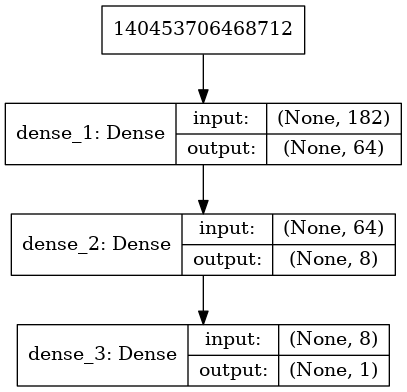

In [ ]:
# multi layer perceptron
clf = Sequential()

# first hidden layer for google reviews
clf.add(Dense(units=64, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))

# second hidden layer
clf.add(Dense(units=8, 
              kernel_initializer='uniform', 
              activation='relu'))

# last hidden layer 
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))

# compile the network
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])


print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

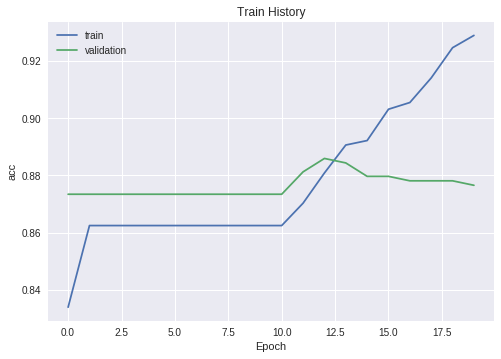

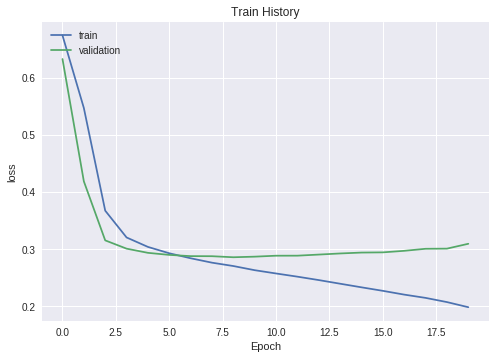

In [ ]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import testdata


(X_train, y_train), (X_test, y_test) = googleplay.load_data()

X_train = X_train.reshape(20000, 28*28).astype('float32')
X_test = X_test.reshape(500, 28*28).astype('float32')
  

X_train = X_train/255
X_test = X_test/255

# keras classification on GOOGLE REVIEWS
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


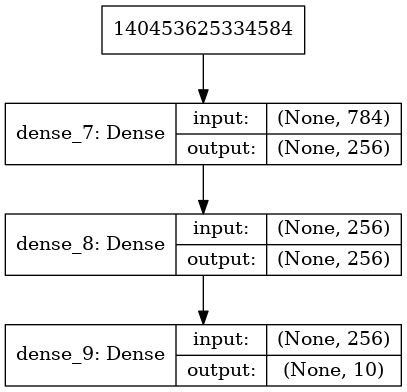

In [ ]:
clf = Sequential()
clf.add(Dense(units=256, 
                input_dim=800, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=256, 
                input_dim=128, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=15, 
                kernel_initializer='normal', 
                activation='softmax'))
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

In [ ]:
clf.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = clf.fit(x=X_train, y=y_train, 
                    validation_split=0.2,  
                    batch_size=200, 
                    epochs=10,
                    verbose=2)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

In [ ]:
from keras.datasets import googleplay
from keras.datasets import testdata
from keras.layers import RNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 2000
max_review_length = 100
embedding_vecor_length = 64

(X_train, y_train), (X_test, y_test) = googleplay.load_data(num_words=top_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.6079 - acc: 0.6839 - val_loss: 0.4370 - val_acc: 0.8262
Epoch 2/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.3350 - acc: 0.8601 - val_loss: 0.3202 - val_acc: 0.8638
Epoch 3/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2731 - acc: 0.8920 - val_loss: 0.3073 - val_acc: 0.8740
Epoch 4/10
 5200/20000 [======>.......................] - ETA: 51s - loss: 0.2369 - acc: 0.9071

20000/20000 [==============================] - 73s 4ms/step - loss: 0.2476 - acc: 0.9042 - val_loss: 0.3145 - val_acc: 0.8696
Epoch 5/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2322 - acc: 0.9104 - val_loss: 0.3283 - val_acc: 0.8680
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2235 - acc: 0.9126 - val_loss: 0.3534 - val_acc: 0.8484
Epoch 7/10
14000/20000 [====================>.........] - ETA: 20s - loss: 0.2158 - acc: 0.9186

20000/20000 [==============================] - 73s 4ms/step - loss: 0.2208 - acc: 0.9150 - val_loss: 0.3402 - val_acc: 0.8668
Epoch 8/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2051 - acc: 0.9223 - val_loss: 0.3417 - val_acc: 0.8526
Epoch 9/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1958 - acc: 0.9253 - val_loss: 0.3535 - val_acc: 0.8636
Epoch 10/10
15400/20000 [======================>.......] - ETA: 15s - loss: 0.1833 - acc: 0.9300

20000/20000 [==============================] - 73s 4ms/step - loss: 0.1885 - acc: 0.9291 - val_loss: 0.3756 - val_acc: 0.8590


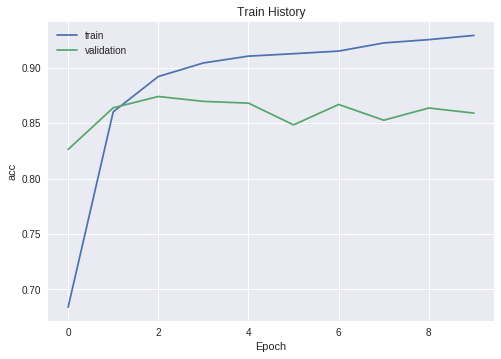

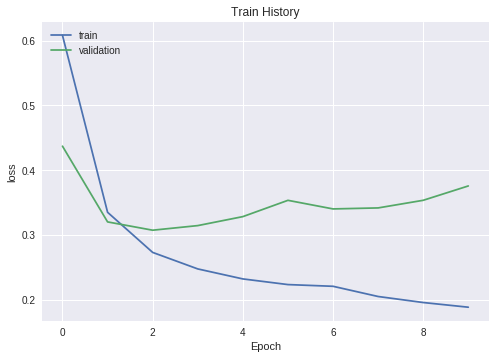

25000/25000 [==============================] - 30s 1ms/step
Accuracy of testing data = 85.9%


In [ ]:
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))